In [1]:
#Vikas, please use this code for data generation
#Multivariate data generator. Positives and negatives are both gaussian mixtures of the same 
#number of components. A positive components is uniquely paired with a negative component. 
# First the paired compnents are learnt to satisfy the AUCPN and irreducibility constraints. 
# Once the pairs satisfy the constraints, the relative position of the + and - component within
# a pair is fixed. 
# Then each pair is moved around in the sapce so that the irreducibility and AUCPN constraint is 
# satisfied. Note that the upper limit of the AUC constraint may not be satisfied between
# the components from different pairs. But the lower limit should be satisfied between them,
# even between the positive (or negative) components from different pairs.
# Note that the final AUCPN between all positives and negatives might be outsided the AUCPN
# range. The final AUCPN will also depend on the proportion in which the components 
# within the positive mixture (and negative mixture) are mixed. 
from data.randomParameters import NormalMixPNParameters2 as NMixPar
from scipy.stats import dirichlet
from data.utils import AUCFromDistributions
def GaussianMixtureDataGenerator(dim, n_comps, aucpn_range, irr_vec):
    NMix = NMixPar(dim, n_comps)
    NMix.perturb2SatisfyMetrics(aucpn_range, irr_vec)
    dg = NMix.dg
    return NMix, dg

#Dimension
dim = 2
#Number of components in positves and negatives each
n_comps = 1
# Setting the thrid entry of irr_vec to False enforces pairwise (between pair of any two compnents)
# mutual irreducibility
# setting the thrid entry of irr_vec to True enforces the strong irreducibility, where each 
# component is irreducible w.r.t. all other components considered together.
# The second entry of irr_vec is the the balanced posterior (responsibility) threshold for irreducibility.
# The first argument is the proportion of points that ought to satisfy the posterior threshold
# for irreducibility to hold true. Using 0.01 and 0.9 is easier to satisfy then 0.05 and 0.95. 
# You may play with this, but note that the stronger irreducibility criteria, the more difficult 
# it is to be satisfied and you might end up in infinite loop since no parameters could be 
# found to satisfy both the irreducibility and auc criteria.
irr_vec = [0.01, 0.9, True]
# aucpn_range contains the desired range of AUCPN to be satisfied between the paired positive 
# and negative component.
# Once the constraints are satisfied between the paired components. The paired components are
# moved together further or close to the other paired components that the AUC constraints can be satisfied between unpaired components
# to the extent possible.
#The minimum AUC range for 1 dimensional datasets is [0.7, 0.75].
#If the AUC range is smaller than that irreducibility can't be achieved when using 
#irr_vec = [0.01, 0.9, False]
aucpn_range = [0.8, 0.85]
#Dataset size
n = 20000
#proportion of positives
alpha = 0.5
NMix, dg = GaussianMixtureDataGenerator(dim, n_comps, aucpn_range, irr_vec)
#x contains the features and y contains the class labels
x, y = dg.pn_data(n)[0:2]
aucpn_final = AUCFromDistributions(dg.dist_p, dg.dist_n)
print(aucpn_final)


isMetricSatisfied{'aucpn': 0.5, 'irreducibility': [0.0, 0.0]}
anchorSetProp0.01
Mu Perturb
isMetricSatisfied{'aucpn': 0.76293788, 'irreducibility': [0.042, 0.0398]}
anchorSetProp0.01
Perturb Proportion
isMetricSatisfied{'aucpn': 0.75650876, 'irreducibility': [0.0476, 0.0454]}
anchorSetProp0.01
Perturb Proportion
isMetricSatisfied{'aucpn': 0.76489568, 'irreducibility': [0.0442, 0.0462]}
anchorSetProp0.01
Sigma Shape Perturb
Sigma Ratios: [2.15130731 1.        ]
Sigma Ratios: [1.67545051 1.        ]
Sigma Ratios: [1.67545051 1.        ]
isMetricSatisfied{'aucpn': 0.74274648, 'irreducibility': [0.0068, 0.139]}
anchorSetProp0.01
Mu Perturb
isMetricSatisfied{'aucpn': 0.8093039200000001, 'irreducibility': [0.0276, 0.264]}
anchorSetProp0.01
0.81457248


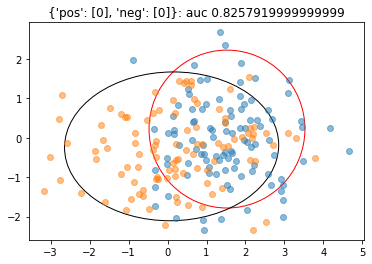

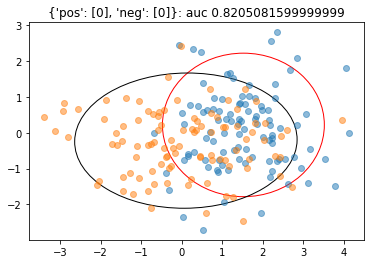

In [2]:
# 2D data visualization. The ellipses capture 95.45% of the data from the corresponding 
# distribution
import numpy as np
from itertools import combinations_with_replacement as comb
NMix.plotCIEllipse()
for (i,j) in comb(np.arange(n_comps),2):
    NMix.plotCIEllipse({'pos':[i],'neg':[j]})
    if i != j:
        NMix.plotCIEllipse({'pos':[i,j],'neg':[]})
        NMix.plotCIEllipse({'pos':[],'neg':[i,j]})
    



In [ ]:
# You may change the mixing proportions within the + (or -) mixture or alpha as follows
p_pos = dirichlet(np.ones(n_comps)).rvs([])
p_neg = dirichlet(np.ones(n_comps)).rvs([])
dg.updateMixProps(alpha=0.3, p_pos = p_pos, p_neg = p_neg)
x, y = dg.pn_data(n)[0:2]
aucpn_final = AUCFromDistributions(dg.dist_p, dg.dist_n)
print(aucpn_final)

### Approximating Irreducibility:
We can quantify irreducibility as the probability mass of the region in the support of the positive density, where the negative density is $0$. This region can be defined in terms of the PN posterior as that region, where the PN posterior takes value of $1$. In theory, this is true irrespective of the value of the class prior. We relax the criteria of defining the region with a PN posterior of $1$ and instead define it with PN Posterior achieving value greater than $a$, for some value of $a$ close to 1. 
\begin{align*}
I_a(f_1,f_0) &= \int \mathbf{I}[p(y=1|x)\geq a] f_1(x)dx\\
 &= \mathbf{E}_{f_1}\big[\mathbf{I}[p(y=1|x)\geq a]\big]
\end{align*}
where $p(y=1|x)$ is the balalnced class posterior, i.e.,
\begin{align*}
p(y=1|x) &= \frac{0.5f_1(x)}{0.5f_1(x) + 0.5 f_0(x)} \\
&= \frac{f_1(x)}{f_1(x) + f_0(x)} 
\end{align*}
Notice that $I_1$ is the probability mass of the region in the support of positives, where the negatives have $0$ density. However, since Gaussian distribution is supported on the entire $R^d$ space, in theory $I_1$ is $0$. By choosing $a$ to be slightly below $1$ we relax the irreducibility criteria. For the data generation below, we used $a=0.95$